In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Remove Dodgy files

In [4]:
import cv2
import imghdr

In [5]:
data_dir='cell_images'

In [6]:
os.listdir(data_dir)

['Parasitized', 'Uninfected']

In [7]:
image_exts =['jpg','bmp','png','jpeg']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except excetions as ex:
            print('Issue with image'.format(image_path))

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data=tf.keras.utils.image_dataset_from_directory('cell_images')

Found 27558 files belonging to 2 classes.


In [11]:
##Prepocess data 

In [12]:
data = data.map(lambda x,y:(x/255,y))

In [13]:
batch =data.as_numpy_iterator().next()

In [14]:
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [15]:
#-0 Parasitized #1-Uninfected

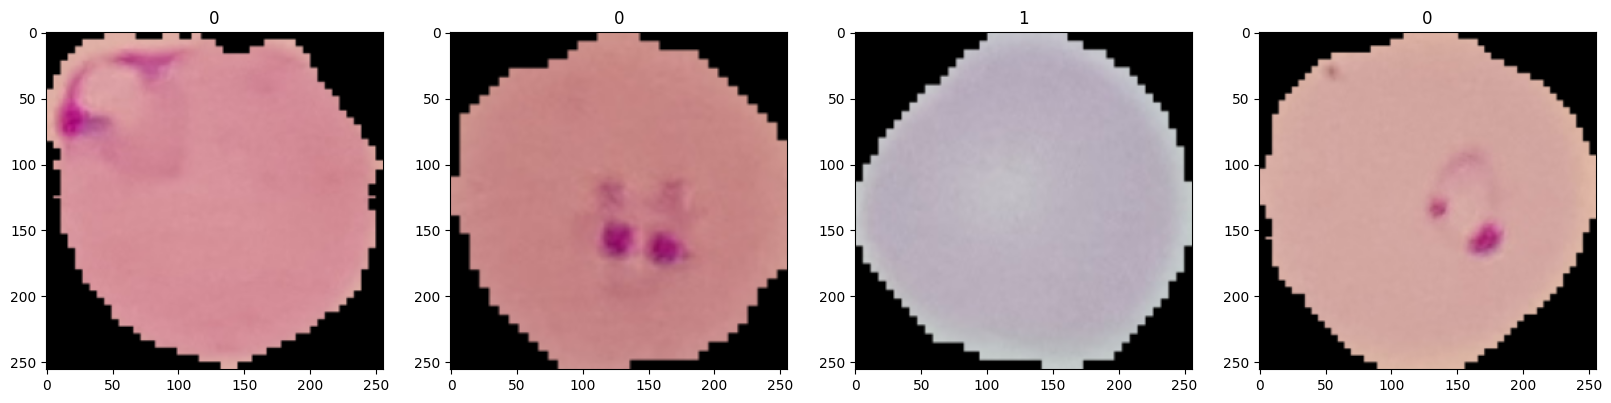

In [16]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [17]:
len(data)

862

In [18]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.2)+1

In [19]:
train =data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
train_size

517

In [21]:
len(test)

172

In [22]:
##Build Deep Learning Model

In [23]:
431+173+258

862

In [24]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,Dropout
from tensorflow.keras.utils import plot_model

In [25]:
model =Sequential()

In [26]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4

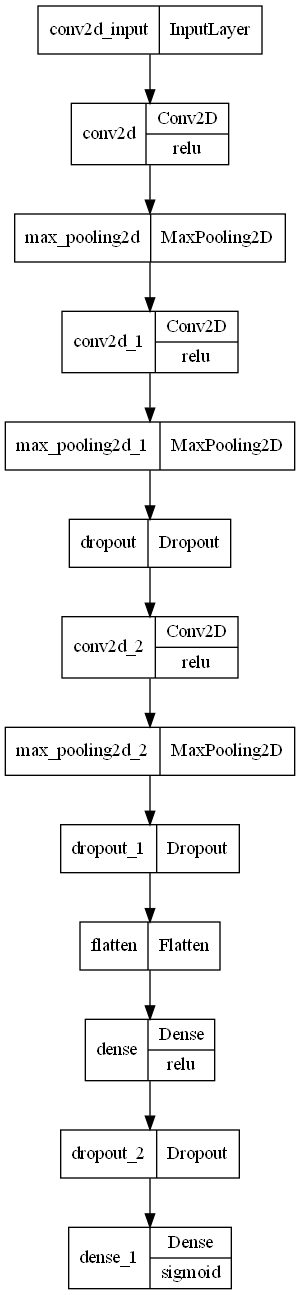

In [29]:
plot_model(model, "model.png", show_layer_activations=True)

In [30]:
##Train

In [31]:
log_dir ='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [33]:
hist = model.fit(train,epochs=5,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/5
517/517 [==============================] - 146s 93ms/step - loss: 0.4844 - accuracy: 0.7672 - val_loss: 0.2568 - val_accuracy: 0.9335
Epoch 2/5
517/517 [==============================] - 55s 106ms/step - loss: 0.2685 - accuracy: 0.9220 - val_loss: 0.2079 - val_accuracy: 0.9386
Epoch 3/5
517/517 [==============================] - 54s 103ms/step - loss: 0.2160 - accuracy: 0.9350 - val_loss: 0.1894 - val_accuracy: 0.9413
Epoch 4/5
517/517 [==============================] - 48s 92ms/step - loss: 0.1860 - accuracy: 0.9401 - val_loss: 0.1686 - val_accuracy: 0.9501
Epoch 5/5
517/517 [==============================] - 46s 90ms/step - loss: 0.1559 - accuracy: 0.9494 - val_loss: 0.1652 - val_accuracy: 0.9483


In [34]:
#Plot Performance

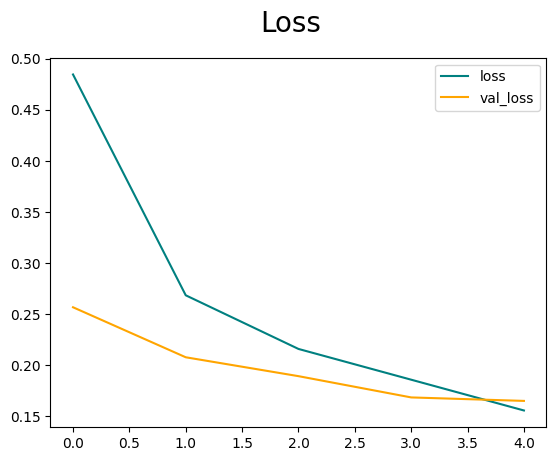

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper right")
plt.show()

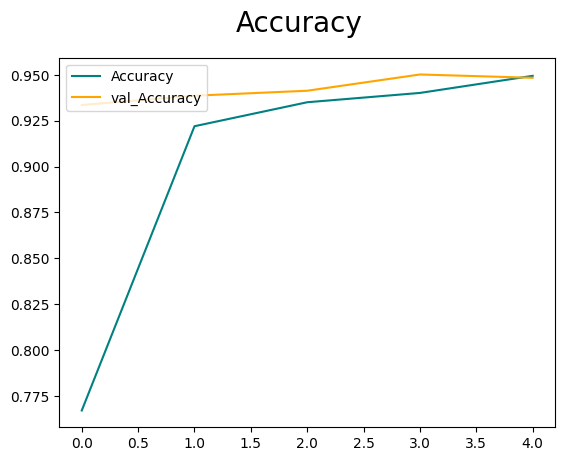

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_Accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [37]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat =model.predict(X)
    for i,j in zip(yhat,y):
        if i[0]>0.50:
            print(1,j)
        else:
            print(0,j)

1/1 [==============================] - 0s 469ms/step
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 0
1 1
0 0
1 0
1 1
1 1
1 1
0 1
1 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1/1 [==============================] - 0s 35ms/step
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1/1 [==============================] - 0s 35ms/step
1 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 1
0 0
1 1
1 1
0 0
1 1
1 1
1/1 [==============================] - 0s 37ms/step
1 1
0 0
1 1
1 1
0 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1/1 [==============================] - 0s 35ms/step
1 1
0 1
1 1
1 1
0 0
1 1
0 0
0 0
0 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1/1 [==============================] - 0s 40ms/step
0 0
1 1
1 1
1 1
0 0
1 0
0 0
0 0
1 1
1 1
1 1
0 0

1/1 [==============================] - 0s 38ms/step
0 0
1 1
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1/1 [==============================] - 0s 38ms/step
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
1 0
1 1
0 0
1 1
0 0
1/1 [==============================] - 0s 33ms/step
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 0
1 1
1 1
1 1
0 0
1 0
1 1
1 1
1 1
1 1
1/1 [==============================] - 0s 39ms/step
1 1
0 0
1 1
0 0
0 0
0 0
0 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
1 0
0 0
0 0
1 1
1 1
1 1
1 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1/1 [==============================] - 0s 34ms/step
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
1 0
1 1
0 1
0 0
1 1
0 0
0 0
1/1 [==============================] - 0s 34ms/step
1 1
1 1
1 1
1 0
1 1
0 0
0 0
1 0
0 0
1 1
0 0
1 1


1/1 [==============================] - 0s 42ms/step
1 1
0 0
1 1
1 1
1 1
1 0
0 0
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
1/1 [==============================] - 0s 42ms/step
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 0
1 0
0 0
1 0
0 0
0 0
1 1
1 0
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1/1 [==============================] - 0s 44ms/step
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 0
0 0
1 0
1 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 0
1 1
0 0
0 1
1/1 [==============================] - 0s 47ms/step
1 1
1 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1/1 [==============================] - 0s 41ms/step
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 0
1 1
0 0
0 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 0
0 0
0 0
1/1 [==============================] - 0s 40ms/step
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1


1/1 [==============================] - 0s 39ms/step
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 0
1 1
1/1 [==============================] - 0s 36ms/step
1 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1/1 [==============================] - 0s 46ms/step
1 1
1 0
1 1
0 1
1 1
0 0
1 1
0 0
1 0
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
1 0
0 0
0 0
0 0
1 1
0 0
1 1
1 0
0 0
1 1
1 1
1 1
1 1
1/1 [==============================] - 0s 39ms/step
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1/1 [==============================] - 0s 44ms/step
1 1
1 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 0
0 0
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
1 1
1/1 [==============================] - 0s 44ms/step
1 1
1 0
0 0
0 0
1 1
0 0
1 0
0 0
1 1
1 1
0 0
1 1


In [38]:
#Checking with a random image

In [39]:
import cv2

In [56]:
image=cv2.imread('infected.png')

In [57]:
image.shape

(163, 151, 3)

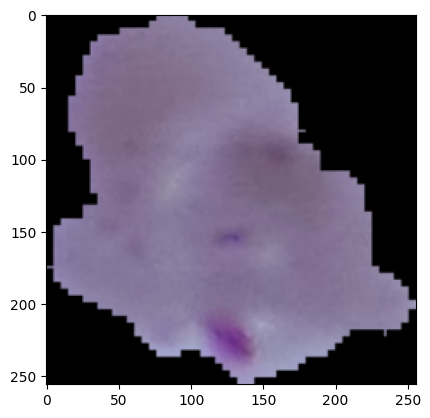

In [58]:
resize = tf.image.resize(image,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 27ms/step


In [60]:
yhat

array([[0.15289274]], dtype=float32)

In [61]:
if yhat[0][0] >0.50:
    print("Uninfected")
else:
    print("Parasitized")

Parasitized


In [67]:
image_2=cv2.imread('uninfected.png')

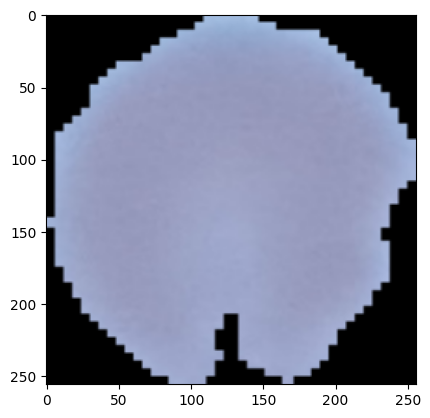

In [68]:
resize_2 = tf.image.resize(image_2,(256,256))
plt.imshow(resize_2.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize_2/255,0))

1/1 [==============================] - 0s 52ms/step


In [70]:
if yhat[0][0] >0.50:
    print("Uninfected")
else:
    print("Parasitized")

Uninfected


In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save(os.path.join('models','malaria.h5'))